In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

## Number of movies

In [3]:
print("Number of movies: ",len(df_movies.title.unique()))

Number of movies:  9737


In [4]:
df_movies = df_movies.set_index("movieId")
df_movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [5]:
genres_df = df_movies['genres'].str.split("|",expand=True)
genres_df.replace({None:np.NaN})

,0,1,2,3,4,5,6,7,8,9
movieId,,,,,,,,,,
1,Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
2,Adventure,Children,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Comedy,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Comedy,Drama,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
193581,Action,Animation,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN
193583,Animation,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
genres_sum = genres_df.apply(pd.Series.value_counts)

In [8]:
genres_sum['sum'] = genres_sum.sum(axis=1)
genres_sum.sort_values('sum', ascending=False)

,0,1,2,3,4,5,6,7,8,9,sum
Drama,2226.0,1649.0,417.0,61.0,8.0,NaN,NaN,NaN,NaN,NaN,4361.0
Comedy,2779.0,624.0,240.0,97.0,16.0,NaN,NaN,NaN,NaN,NaN,3756.0
Thriller,84.0,517.0,730.0,424.0,116.0,17.0,4.0,1.0,1.0,NaN,1894.0
Action,1828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1828.0
Romance,38.0,825.0,566.0,122.0,29.0,14.0,2.0,NaN,NaN,NaN,1596.0
Adventure,653.0,610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1263.0
Crime,537.0,499.0,133.0,26.0,4.0,NaN,NaN,NaN,NaN,NaN,1199.0
Sci-Fi,62.0,318.0,398.0,143.0,39.0,18.0,2.0,NaN,NaN,NaN,980.0
Horror,468.0,364.0,111.0,30.0,4.0,NaN,1.0,NaN,NaN,NaN,978.0
Fantasy,42.0,259.0,300.0,125.0,48.0,5.0,NaN,NaN,NaN,NaN,779.0


## Top 10 movies with highest rate 

In [9]:
movie_ratings = df_ratings.groupby("movieId").mean()
movie_ratings.drop(columns=['userId','timestamp'], inplace=True)

In [10]:
df_movies = pd.merge(df_movies, movie_ratings, left_index=True, right_index=True)

,title,genres,rating
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
193585,Flint (2017),Drama,3.500000


In [11]:
best_rating_movies = df_movies.sort_values('rating', ascending=False)[:10]
best_rating_movies

,title,genres,rating
movieId,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
100556,"Act of Killing, The (2012)",Documentary,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,5.0
143511,Human (2015),Documentary,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
6201,Lady Jane (1986),Drama|Romance,5.0
102217,Bill Hicks: Revelations (1993),Comedy,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0


Text(0, 0.5, 'Avg Rate')

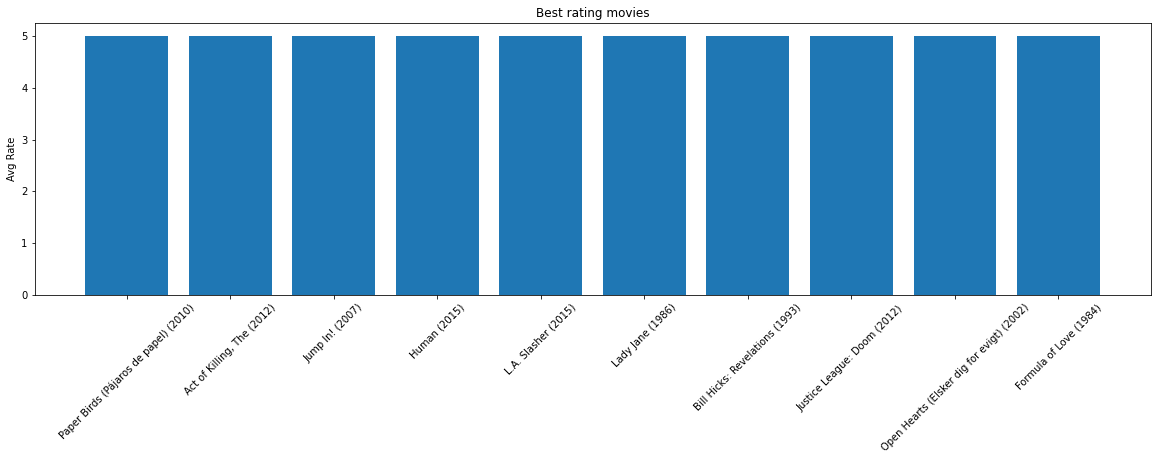

In [12]:
plt.figure(figsize=(20,5))
plt.bar(data=best_rating_movies, x='title', height='rating')
plt.title('Best rating movies')
plt.xticks(rotation = 45)
plt.ylabel('Avg Rate')

## Most often rating users 

In [13]:
most_rating_users = df_ratings['userId'].value_counts()[:5]
most_rating_users

414    2698
599    2478
474    2108
448    1864
274    1346
Name: userId, dtype: int64

In [14]:
user_ids = most_rating_users.index
user_ids = user_ids.astype(str)

Text(0, 0.5, 'Number of ratings')

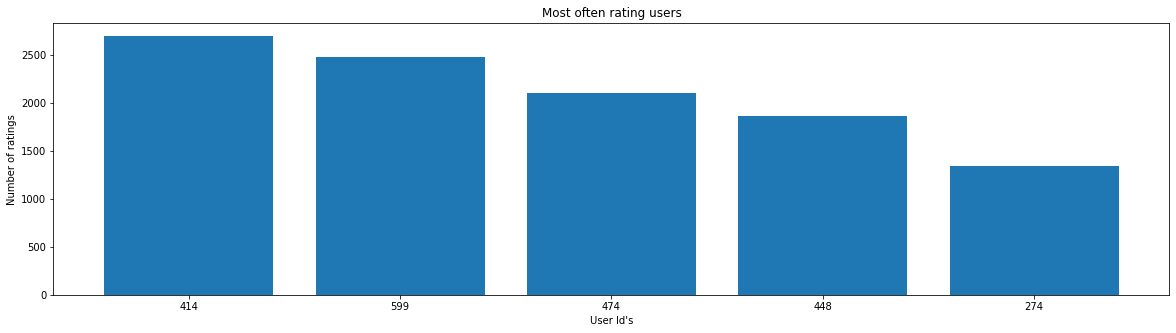

In [15]:
plt.figure(figsize=(20,5))
plt.bar(x=user_ids, height=most_rating_users)
plt.title('Most often rating users')
plt.xlabel("User Id's")
plt.ylabel("Number of ratings")

## When was done first and last rate included in data set and what was the rated movie tittle?

In [16]:
from datetime import date
from datetime import datetime, timedelta

In [17]:
df_ratings['date'] = df_ratings['timestamp'].apply(date.fromtimestamp)

### First rate

In [18]:
df_ratings.date.min()

datetime.date(1996, 3, 29)

### Last date

In [19]:
df_ratings.date.max()

datetime.date(2018, 9, 24)

## All movies released in 1990

In [20]:
def get_year(x):
    start = x.find('(')
    end = x.find(')')
    return x[start+1:end]

In [21]:
df_movies['released_date'] = df_movies.title.apply(get_year)

In [22]:
movies1990 = df_movies[df_movies['released_date'] == '1990']
movies1990

,title,genres,rating,released_date
movieId,,,,
586,Home Alone (1990),Children|Comedy,2.995690,1990
587,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller,3.434783,1990
590,Dances with Wolves (1990),Adventure|Drama|Western,3.835366,1990
597,Pretty Woman (1990),Comedy|Romance,3.485185,1990
1100,Days of Thunder (1990),Action|Drama|Romance,2.710526,1990
...,...,...,...,...
93208,Mickey's The Prince and the Pauper (1990),Animation|Children,2.000000,1990
99122,I Bought a Vampire Motorcycle (1990),Comedy|Horror,3.500000,1990
100906,Maniac Cop 2 (1990),Action|Horror|Thriller,5.000000,1990
